In [4]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
data=load_iris()
print(dir(data))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [12]:
x=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.DataFrame(data.target)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=33)
print(x_train.shape,y_train.shape)

(135, 4) (135, 1)


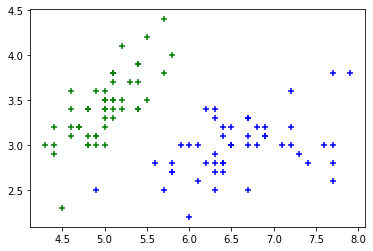

In [32]:
#data plotting
x['targets']=data.target
x['target_names']=x['targets'].apply(lambda x: data.target_names[x])
plt.scatter(x[x['target_names']=='setosa']['sepal length (cm)'],x[x['target_names']=='setosa']['sepal width (cm)'],marker='+',color='g')
plt.scatter(x[x['target_names']=='virginica']['sepal length (cm)'],x[x['target_names']=='virginica']['sepal width (cm)'],marker='+',color='b')

In [34]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

/home/akhtar/anaconda3/envs/jupyter/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1.0

In [35]:
rf=RandomForestClassifier(n_estimators=5)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

/home/akhtar/anaconda3/envs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1.0

In [67]:
from sklearn.datasets import load_digits
data=load_digits()
print(dir(data))
x=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.DataFrame(data.target)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
print(x_train.shape,y_train.shape)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
(1617, 64) (1617, 1)


In [48]:
x.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:

for i in range(0,5):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    print(lr.score(x_test,y_test),':logistic regression')
    rf=RandomForestClassifier(n_estimators=5)
    rf.fit(x_train,y_train)
    print(rf.score(x_test,y_test),':random forest')

0.9555555555555556 :logistic regression
0.8944444444444445 :random forest
0.9555555555555556 :logistic regression
0.8777777777777778 :random forest
0.9611111111111111 :logistic regression
0.9333333333333333 :random forest
0.9666666666666667 :logistic regression
0.9055555555555556 :random forest
0.9777777777777777 :logistic regression
0.9277777777777778 :random forest


In [57]:
from sklearn.model_selection import KFold, StratifiedKFold

In [60]:
kf=KFold(n_splits=3)
for train_index,test_index in kf.split([1,2,3,4,5,6]):
    print(train_index,test_index)

[2 3 4 5] [0 1]
[0 1 4 5] [2 3]
[0 1 2 3] [4 5]


In [73]:
def get_model_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [80]:
rf_scores=[]
lr_scores=[]
svm_scores=[]
skf=StratifiedKFold(n_splits=8)
for train_index,test_index in skf.split(data.data,data.target):
    rf_scores.append(get_model_score(RandomForestClassifier(n_estimators=5),x.loc[train_index],x.loc[test_index],y.loc[train_index],y.loc[test_index]))
    lr_scores.append(get_model_score(LogisticRegression(),x.loc[train_index],x.loc[test_index],y.loc[train_index],y.loc[test_index]))
    svm_scores.append(get_model_score(SVC(),x.loc[train_index],x.loc[test_index],y.loc[train_index],y.loc[test_index]))

In [81]:
print(rf_scores)
print(svm_scores)
print(lr_scores)

[0.7955555555555556, 0.9244444444444444, 0.8044444444444444, 0.8844444444444445, 0.8666666666666667, 0.9375, 0.9107142857142857, 0.8482142857142857]
[0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9866666666666667, 0.9866666666666667, 0.9866071428571429, 0.9821428571428571, 0.9151785714285714]
[0.9066666666666666, 0.9777777777777777, 0.8711111111111111, 0.9511111111111111, 0.9733333333333334, 0.9196428571428571, 0.9330357142857143, 0.8973214285714286]


In [83]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(n_estimators=5),data.data,data.target,cv=8)

array([0.85333333, 0.92      , 0.76888889, 0.92888889, 0.88      ,
       0.93303571, 0.89732143, 0.79017857])